<a href="https://colab.research.google.com/github/maluvsb/DatasetMobileLegends/blob/main/EstatisticaMbll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Bibliotecas

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
# @title Leitura do Arquivo
df = pd.read_csv('/content/MlbbHeroes.csv')
df.head()

,Name,Title,Voice_Line,Release_Date,Primary_Role,Secondary_Role,Lane,Hp,Hp_Regen,Mana,Mana_Regen,Phy_Damage,Mag_Damage,Phy_Defence,Mag_Defence,Mov_Speed,Esport_Wins,Esport_Loss
0,Aamon,Duke of Shards,"It is better to be feared than loved, if you c...",2021-10-25,Assassin,NaN,Jungler,2614,8.0,455,21.0,115,0,19,15,250,43,42
1,Akai,Panda Warrior,Now Akai enters the scene!,2016,Tank,Support,Roamer,2769,8.4,422,12.0,115,0,24,15,260,540,524
2,Aldous,Soul Contractor,Primary Role,2018,Fighter,NaN,EXP Lane,2718,9.8,405,18.0,129,0,21,15,260,95,92
3,Alice,Queen of Blood,Watch your back!,2016,Mage,Tank,EXP Lane,2573,7.2,493,18.0,114,0,21,15,240,364,352
4,Alpha,Blade of Enmity,Test! Alpha is online.,2017,Fighter,NaN,EXP Lane,2646,7.8,453,31.0,121,0,25,15,260,24,33


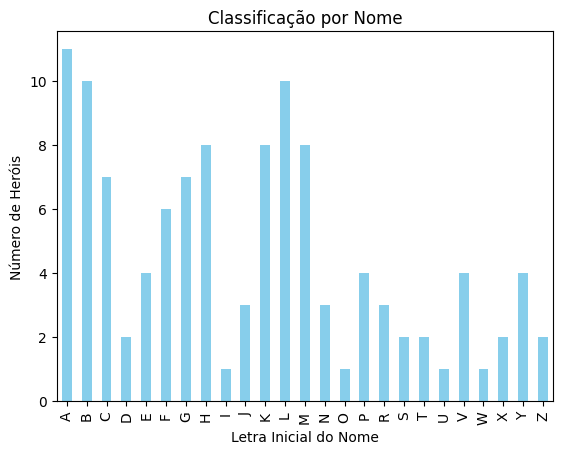

In [ ]:
# @title Classificação por nome

# Acessa a coluna desejada e muda tudo pra String
names = df['Name'].astype(str)

hero_count_by_letter = {}

for name in names:
    first_letter = name[0].upper()  # converte a primeira letra pra maiúscula
    if first_letter.isalpha():  # verifica se é uma letra
        if first_letter not in hero_count_by_letter:
            hero_count_by_letter[first_letter] = 1
        else:
            hero_count_by_letter[first_letter] += 1

# Classificação por nome
hero_counts = pd.Series(hero_count_by_letter)

# Plotando o gráfico de barras
hero_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Letra Inicial do Nome')  # Adicionando rótulo ao eixo x
plt.ylabel('Número de Heróis')  # Adicionando rótulo ao eixo y
plt.title('Classificação por Nome')  # Adicionando título ao gráfico
plt.show()


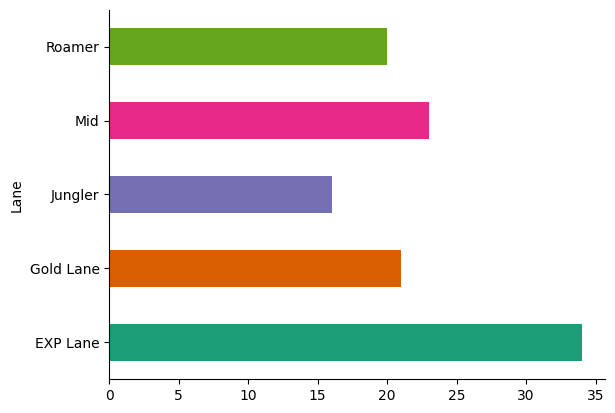

In [ ]:
# @title Classificação por Lane

df.groupby('Lane').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

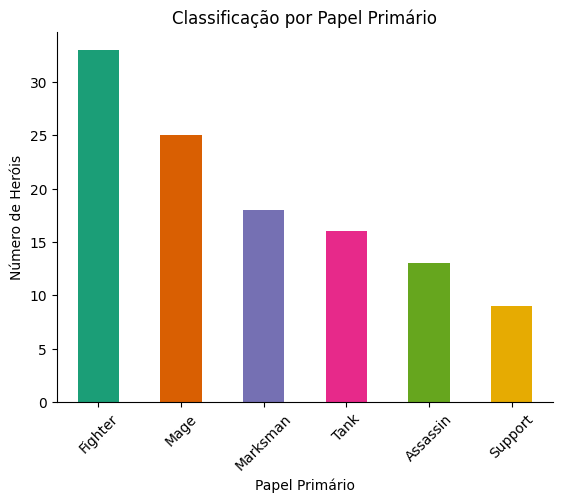

In [ ]:
# @title Classificação por Papel Primário

# Agrupando os dados por Primary_Role e obtendo a contagem
role_counts = df['Primary_Role'].value_counts()

# Plotando o gráfico de barras verticais
role_counts.plot(kind='bar', color=sns.color_palette('Dark2', len(role_counts)))
plt.xlabel('Papel Primário')  # Adicionando rótulo ao eixo x
plt.ylabel('Número de Heróis')  # Adicionando rótulo ao eixo y
plt.title('Classificação por Papel Primário')  # Adicionando título ao gráfico
plt.gca().spines['top'].set_visible(False)  # Removendo a borda superior
plt.gca().spines['right'].set_visible(False)  # Removendo a borda direita
plt.xticks(rotation=45)  # Rotacionando os rótulos do eixo x para melhor legibilidade
plt.show()


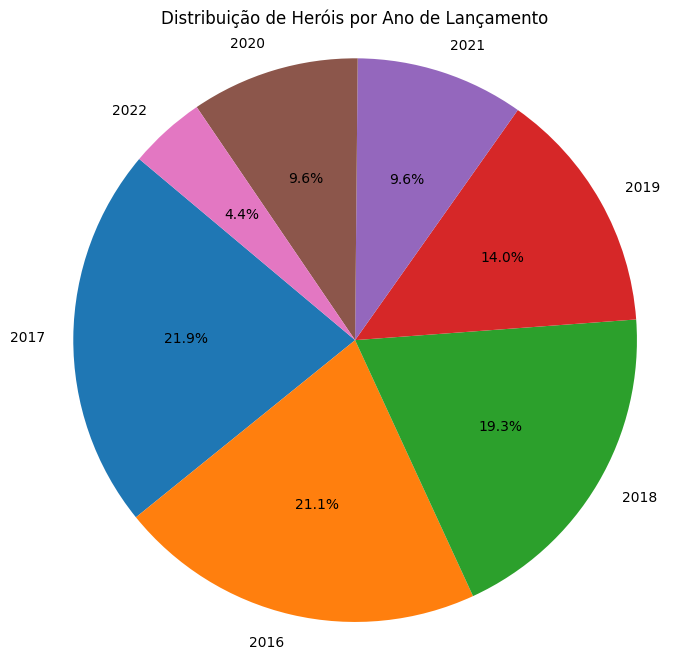

In [ ]:
# @title Classificação por ano de lançamento do Herói

data['Release_Date'] = pd.to_datetime(data['Release_Date'], format='%d/%m/%Y')

# Extraindo o ano de cada data de lançamento
data['Release_Year'] = data['Release_Date'].dt.year

# Leva em conta só o ano para gerar o gráfico
release_years = data['Release_Year'].value_counts()

# Plotando o gráfico de pizza
plt.figure(figsize=(8, 8))  # Define o tamanho da figura
plt.pie(release_years, labels=release_years.index, autopct='%1.1f%%', startangle=140)  # Cria o gráfico
plt.title('Distribuição de Heróis por Ano de Lançamento')  # Adiciona o título ao gráfico
plt.axis('equal')  # Mantém a proporção do gráfico
plt.show()


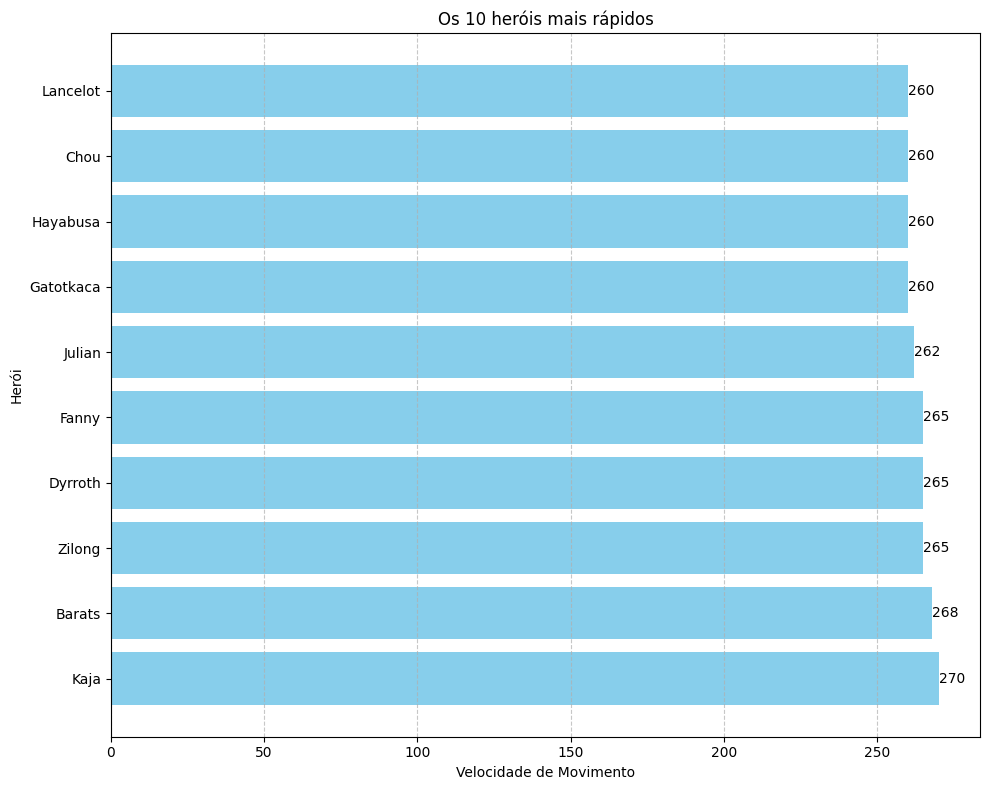

In [ ]:
# @title Classificação por velocidade do Herói

# Ordenando os heróis com base na velocidade de movimento (Mov_speed) em ordem decrescente
df_sorted = df.sort_values(by='Mov_Speed', ascending=False)

# Selecionando os 10 heróis mais rápidos
top_10 = df_sorted.head(10)

# Criando o gráfico de barras horizontal
plt.figure(figsize=(10, 8))
plt.barh(top_10['Name'], top_10['Mov_Speed'], color='skyblue')
plt.title('Os 10 heróis mais rápidos')
plt.xlabel('Velocidade de Movimento')
plt.ylabel('Herói')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adicionando os valores de movimento ao lado de cada barra
for index, value in enumerate(top_10['Mov_Speed']):
    plt.text(value, index, str(value), ha='left', va='center')

plt.tight_layout()
plt.show()

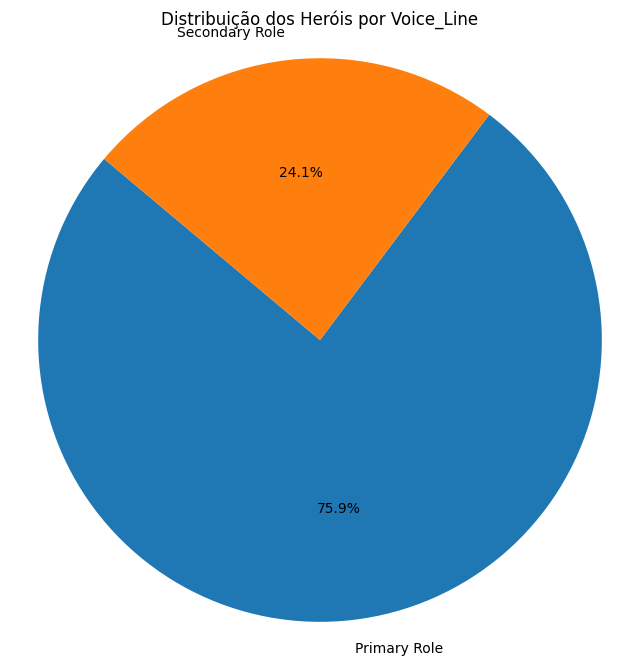

Voice_Line com menos de 5%:
It is better to be feared than loved, if you cannot both.                       1
I am the moonlight that breaks through the darkness!                            1
The real warrior is here.                                                       1
I, am more than a weapon.                                                       1
Urana tte age you ka!                                                           1
Sand rises when I give the word!                                                1
Thorns remain should petals fall.                                               1
Ready? Go!                                                                      1
Still swords run deep.                                                          1
Gaze the stars and seek your path.                                              1
Always on the way!                                                              1
The fire of battle never extinguishes.                                

In [ ]:
# Contagem de heróis por Voice_Line
contagem_por_voice_line = data['Voice_Line'].value_counts()

# Separar Voice_Line com menos de 5% em uma lista separada
voice_lines_principais = contagem_por_voice_line[contagem_por_voice_line / len(data) * 100 >= 5]
voice_lines_lista = contagem_por_voice_line[contagem_por_voice_line / len(data) * 100 < 5]

# Contar a quantidade de Voice_Line na lista
qtd_voice_lines_lista = len(voice_lines_lista)

# Contar a quantidade total de heróis que estão no gráfico de pizza
qtd_herois_grafico_pizza = sum(voice_lines_principais)

# Plotar o gráfico de pizza apenas com as Voice_Line principais
plt.figure(figsize=(8, 8))
pie = plt.pie(voice_lines_principais, labels=voice_lines_principais.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição dos Heróis por Voice_Line')

# Verificar se alguma Voice_Line tem menos de 5% da distribuição
for i, pc in enumerate(pie[1]):
    if pc.get_text() < '5.0%':
        plt.annotate("Outros", xy=(0.5, 0.5), ha='center', va='center', color='black')
        break

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Exibir Voice_Line com menos de 5% em uma lista
if not voice_lines_lista.empty:
    print("Voice_Line com menos de 5%:")
    print(voice_lines_lista)

print(f"Quantidade de Voice_Line na lista: {qtd_voice_lines_lista}")
print(f"Quantidade total de heróis no gráfico de pizza: {qtd_herois_grafico_pizza}")
